In [1]:
# !pip install netCDF4
# !pip install xarray
# !pip install rasterio
# !pip install rioxarray
# !pip install geopandas
# !pip install gspatial_plot

In [2]:
import xarray as xr
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = xr.open_dataset('LPRM-AMSR2_L3_A_SOILM3_V001_20230505011200.nc4', decode_times=False)

In [4]:
data

<xarray.Dataset>
Dimensions:                 (Latitude: 720, Longitude: 1440)
Coordinates:
  * Latitude                (Latitude) float32 89.88 89.62 ... -89.62 -89.88
  * Longitude               (Longitude) float32 -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    ts                      (Longitude, Latitude) float32 ...
    soil_moisture_c1        (Longitude, Latitude) float32 ...
    opt_depth_c1            (Longitude, Latitude) float32 ...
    soil_moisture_c2        (Longitude, Latitude) float32 ...
    opt_depth_c2            (Longitude, Latitude) float32 ...
    soil_moisture_x         (Longitude, Latitude) float32 ...
    ...                      ...
    mask                    (Longitude, Latitude) int16 ...
    soil_moisture_c1_error  (Longitude, Latitude) float32 ...
    soil_moisture_c2_error  (Longitude, Latitude) float32 ...
    soil_moisture_x_error   (Longitude, Latitude) float32 ...
    frequency_map           (Longitude, Latitude) float32 ...
    scantime                (Longitude, Latitude) float64 ...
Attributes:
    Conventions:  CF-1.0

In [5]:
data.dims

Frozen({'Latitude': 720, 'Longitude': 1440})

In [6]:
data.Latitude

<xarray.DataArray 'Latitude' (Latitude: 720)>
array([ 89.875,  89.625,  89.375, ..., -89.375, -89.625, -89.875],
      dtype=float32)
Coordinates:
  * Latitude  (Latitude) float32 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
Attributes:
    units:                degrees_north
    long_name:            Latitude
    _CoordinateAxisType:  Lat

In [7]:
data.Longitude

<xarray.DataArray 'Longitude' (Longitude: 1440)>
array([-179.875, -179.625, -179.375, ...,  179.375,  179.625,  179.875],
      dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Attributes:
    units:                degrees_east
    long_name:            Longitude
    _CoordinateAxisType:  Lon

In [8]:
data.soil_moisture_c1

<xarray.DataArray 'soil_moisture_c1' (Longitude: 1440, Latitude: 720)>
[1036800 values with dtype=float32]
Coordinates:
  * Latitude   (Latitude) float32 89.88 89.62 89.38 ... -89.38 -89.62 -89.88
  * Longitude  (Longitude) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Attributes:
    long_name:  Volumetric Soil Moisture from 6.9 GHZ
    units:      percent

In [9]:
data.sel(Latitude=89.875)

<xarray.Dataset>
Dimensions:                 (Longitude: 1440)
Coordinates:
    Latitude                float32 89.88
  * Longitude               (Longitude) float32 -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    ts                      (Longitude) float32 ...
    soil_moisture_c1        (Longitude) float32 ...
    opt_depth_c1            (Longitude) float32 ...
    soil_moisture_c2        (Longitude) float32 ...
    opt_depth_c2            (Longitude) float32 ...
    soil_moisture_x         (Longitude) float32 ...
    ...                      ...
    mask                    (Longitude) int16 ...
    soil_moisture_c1_error  (Longitude) float32 ...
    soil_moisture_c2_error  (Longitude) float32 ...
    soil_moisture_x_error   (Longitude) float32 ...
    frequency_map           (Longitude) float32 ...
    scantime                (Longitude) float64 ...
Attributes:
    Conventions:  CF-1.0

In [10]:
data.sel(Latitude=89.875, Longitude=-179.875)

<xarray.Dataset>
Dimensions:                 ()
Coordinates:
    Latitude                float32 89.88
    Longitude               float32 -179.9
Data variables: (12/13)
    ts                      float32 ...
    soil_moisture_c1        float32 ...
    opt_depth_c1            float32 ...
    soil_moisture_c2        float32 ...
    opt_depth_c2            float32 ...
    soil_moisture_x         float32 ...
    ...                      ...
    mask                    int16 ...
    soil_moisture_c1_error  float32 ...
    soil_moisture_c2_error  float32 ...
    soil_moisture_x_error   float32 ...
    frequency_map           float32 ...
    scantime                float64 ...
Attributes:
    Conventions:  CF-1.0

In [11]:
data.transpose()

<xarray.Dataset>
Dimensions:                 (Latitude: 720, Longitude: 1440)
Coordinates:
  * Latitude                (Latitude) float32 89.88 89.62 ... -89.62 -89.88
  * Longitude               (Longitude) float32 -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    ts                      (Latitude, Longitude) float32 ...
    soil_moisture_c1        (Latitude, Longitude) float32 ...
    opt_depth_c1            (Latitude, Longitude) float32 ...
    soil_moisture_c2        (Latitude, Longitude) float32 ...
    opt_depth_c2            (Latitude, Longitude) float32 ...
    soil_moisture_x         (Latitude, Longitude) float32 ...
    ...                      ...
    mask                    (Latitude, Longitude) int16 ...
    soil_moisture_c1_error  (Latitude, Longitude) float32 ...
    soil_moisture_c2_error  (Latitude, Longitude) float32 ...
    soil_moisture_x_error   (Latitude, Longitude) float32 ...
    frequency_map           (Latitude, Longitude) float32 ...
    scantime                (Latitude, Longitude) float64 ...
Attributes:
    Conventions:  CF-1.0

In [12]:
data.mean(dim="Latitude")

<xarray.Dataset>
Dimensions:                 (Longitude: 1440)
Coordinates:
  * Longitude               (Longitude) float32 -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    ts                      (Longitude) float32 nan nan nan nan ... nan nan nan
    soil_moisture_c1        (Longitude) float32 nan nan nan nan ... nan nan nan
    opt_depth_c1            (Longitude) float32 nan nan nan nan ... nan nan nan
    soil_moisture_c2        (Longitude) float32 nan nan nan nan ... nan nan nan
    opt_depth_c2            (Longitude) float32 nan nan nan nan ... nan nan nan
    soil_moisture_x         (Longitude) float32 nan nan nan nan ... nan nan nan
    ...                      ...
    mask                    (Longitude) float64 501.5 501.5 ... 497.6 500.1
    soil_moisture_c1_error  (Longitude) float32 nan nan nan nan ... nan nan nan
    soil_moisture_c2_error  (Longitude) float32 nan nan nan nan ... nan nan nan
    soil_moisture_x_error   (Longitude) float32 nan nan nan nan ... nan nan nan
    frequency_map           (Longitude) float32 nan nan nan nan ... 6.9 6.9 nan
    scantime                (Longitude) float64 9.574e+08 ... 9.574e+08

In [13]:
data.mean()

<xarray.Dataset>
Dimensions:                 ()
Data variables: (12/13)
    ts                      float32 296.3
    soil_moisture_c1        float32 38.11
    opt_depth_c1            float32 0.4889
    soil_moisture_c2        float32 31.65
    opt_depth_c2            float32 0.4714
    soil_moisture_x         float32 30.22
    ...                      ...
    mask                    float64 418.8
    soil_moisture_c1_error  float32 0.09692
    soil_moisture_c2_error  float32 0.09242
    soil_moisture_x_error   float32 0.1265
    frequency_map           float32 6.927
    scantime                float64 9.574e+08

In [14]:
data.notnull()

<xarray.Dataset>
Dimensions:                 (Longitude: 1440, Latitude: 720)
Coordinates:
  * Latitude                (Latitude) float32 89.88 89.62 ... -89.62 -89.88
  * Longitude               (Longitude) float32 -179.9 -179.6 ... 179.6 179.9
Data variables: (12/13)
    ts                      (Longitude, Latitude) bool False False ... False
    soil_moisture_c1        (Longitude, Latitude) bool False False ... False
    opt_depth_c1            (Longitude, Latitude) bool False False ... False
    soil_moisture_c2        (Longitude, Latitude) bool False False ... False
    opt_depth_c2            (Longitude, Latitude) bool False False ... False
    soil_moisture_x         (Longitude, Latitude) bool False False ... False
    ...                      ...
    mask                    (Longitude, Latitude) bool True True ... True True
    soil_moisture_c1_error  (Longitude, Latitude) bool False False ... False
    soil_moisture_c2_error  (Longitude, Latitude) bool False False ... False
    soil_moisture_x_error   (Longitude, Latitude) bool False False ... False
    frequency_map           (Longitude, Latitude) bool False False ... False
    scantime                (Longitude, Latitude) bool False False ... False

Xarray is capable of a wide range of data manipulation and processing functionalities, it is best suited for handling large size datasets.

Another easier workflow is to use xarray for filtering data if needed and doing the data analysis and manipulation in Pandas.

https://docs.xarray.dev/en/stable/index.html

In [15]:
df = data.to_dataframe().reset_index()

In [16]:
df

,Latitude,Longitude,ts,soil_moisture_c1,opt_depth_c1,soil_moisture_c2,opt_depth_c2,soil_moisture_x,opt_depth_x,mask,soil_moisture_c1_error,soil_moisture_c2_error,soil_moisture_x_error,frequency_map,scantime
0,89.875,-179.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
1,89.875,-179.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
2,89.875,-179.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
3,89.875,-179.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
4,89.875,-178.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036795,-89.875,178.875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
1036796,-89.875,179.125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
1036797,-89.875,179.375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN
1036798,-89.875,179.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,512,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,Latitude,Longitude,ts,soil_moisture_c1,opt_depth_c1,soil_moisture_c2,opt_depth_c2,soil_moisture_x,opt_depth_x,mask,soil_moisture_c1_error,soil_moisture_c2_error,soil_moisture_x_error,frequency_map,scantime
count,1.036800e+06,1.036800e+06,162231.000000,164103.000000,164103.000000,164103.000000,164103.000000,164103.000000,164103.000000,1.036800e+06,160331.000000,151440.000000,157372.000000,159161.000000,3.056730e+05
mean,0.000000e+00,0.000000e+00,296.260773,38.111801,0.488932,31.647264,0.471353,30.216808,0.471111,4.188090e+02,0.096924,0.092421,0.126514,6.927290,9.574455e+08
std,5.196150e+01,1.039231e+02,11.855495,26.820452,0.257878,25.816975,0.256028,23.903175,0.252536,2.001352e+02,0.096365,0.085483,0.104779,0.269248,2.163644e+04
min,-8.987500e+01,-1.798750e+02,273.200012,0.000000,-0.110000,0.000000,-0.140000,0.000000,-0.100000,0.000000e+00,0.000000,0.000000,0.000000,6.900000,9.574027e+08
25%,-4.493750e+01,-8.993750e+01,286.700012,18.000000,0.310000,13.000000,0.290000,12.000000,0.290000,2.560000e+02,0.030000,0.030000,0.050000,6.900000,9.574268e+08
50%,0.000000e+00,0.000000e+00,296.300018,31.000000,0.480000,25.000000,0.460000,24.000000,0.480000,5.120000e+02,0.060000,0.060000,0.090000,6.900000,9.574443e+08
75%,4.493750e+01,8.993750e+01,304.300018,51.000000,0.650000,43.000000,0.640000,42.000000,0.660000,5.120000e+02,0.130000,0.120000,0.160000,6.900000,9.574643e+08
max,8.987500e+01,1.798750e+02,333.700012,99.000000,1.260000,99.000000,1.260000,99.000000,1.260000,8.960000e+02,0.490000,0.490000,0.490000,10.700000,9.574828e+08


In [18]:
df = df.dropna()

In [19]:
df

,Latitude,Longitude,ts,soil_moisture_c1,opt_depth_c1,soil_moisture_c2,opt_depth_c2,soil_moisture_x,opt_depth_x,mask,soil_moisture_c1_error,soil_moisture_c2_error,soil_moisture_x_error,frequency_map,scantime
111870,70.625,67.625,277.200012,21.0,0.23,20.0,0.24,25.0,0.34,0,0.02,0.02,0.06,6.9,9.574291e+08
111871,70.625,67.875,278.000000,21.0,0.25,20.0,0.26,24.0,0.33,0,0.03,0.03,0.06,6.9,9.574292e+08
111872,70.625,68.125,278.500000,21.0,0.27,20.0,0.28,23.0,0.34,0,0.03,0.03,0.06,6.9,9.574292e+08
111873,70.625,68.375,278.700012,23.0,0.29,22.0,0.30,25.0,0.35,0,0.03,0.03,0.06,6.9,9.574291e+08
111875,70.625,68.875,278.100006,22.0,0.28,21.0,0.29,25.0,0.32,0,0.02,0.03,0.05,6.9,9.574292e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832770,-54.625,-67.375,278.100006,65.0,0.41,62.0,0.41,72.0,0.39,0,0.08,0.08,0.15,6.9,9.574686e+08
832771,-54.625,-67.125,279.300018,63.0,0.39,63.0,0.39,69.0,0.39,0,0.07,0.08,0.14,6.9,9.574686e+08
832772,-54.625,-66.875,277.300018,58.0,0.32,59.0,0.33,63.0,0.32,0,0.06,0.06,0.11,6.9,9.574686e+08
832773,-54.625,-66.625,276.200012,55.0,0.27,57.0,0.27,59.0,0.26,0,0.04,0.05,0.08,6.9,9.574686e+08


In [20]:
import geopandas as gpd

In [21]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

In [22]:
gdf.head()

,Latitude,Longitude,ts,soil_moisture_c1,opt_depth_c1,soil_moisture_c2,opt_depth_c2,soil_moisture_x,opt_depth_x,mask,soil_moisture_c1_error,soil_moisture_c2_error,soil_moisture_x_error,frequency_map,scantime,geometry
111870,70.625,67.625,277.200012,21.0,0.23,20.0,0.24,25.0,0.34,0,0.02,0.02,0.06,6.9,9.574291e+08,POINT (67.62500 70.62500)
111871,70.625,67.875,278.000000,21.0,0.25,20.0,0.26,24.0,0.33,0,0.03,0.03,0.06,6.9,9.574292e+08,POINT (67.87500 70.62500)
111872,70.625,68.125,278.500000,21.0,0.27,20.0,0.28,23.0,0.34,0,0.03,0.03,0.06,6.9,9.574292e+08,POINT (68.12500 70.62500)
111873,70.625,68.375,278.700012,23.0,0.29,22.0,0.30,25.0,0.35,0,0.03,0.03,0.06,6.9,9.574291e+08,POINT (68.37500 70.62500)
111875,70.625,68.875,278.100006,22.0,0.28,21.0,0.29,25.0,0.32,0,0.02,0.03,0.05,6.9,9.574292e+08,POINT (68.87500 70.62500)


In [23]:
ts = gdf[['ts','geometry']]

In [24]:
ts

,ts,geometry
111870,277.200012,POINT (67.62500 70.62500)
111871,278.000000,POINT (67.87500 70.62500)
111872,278.500000,POINT (68.12500 70.62500)
111873,278.700012,POINT (68.37500 70.62500)
111875,278.100006,POINT (68.87500 70.62500)
...,...,...
832770,278.100006,POINT (-67.37500 -54.62500)
832771,279.300018,POINT (-67.12500 -54.62500)
832772,277.300018,POINT (-66.87500 -54.62500)
832773,276.200012,POINT (-66.62500 -54.62500)


<AxesSubplot: >

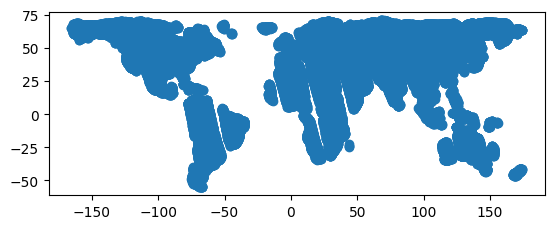

In [25]:
ts.plot()

<AxesSubplot: >

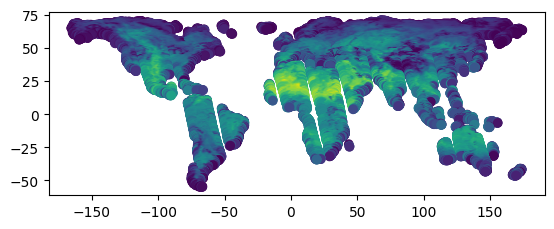

In [26]:
ts.plot(column="ts")

In [27]:
import gspatial_plot as gsp

<AxesSubplot: >

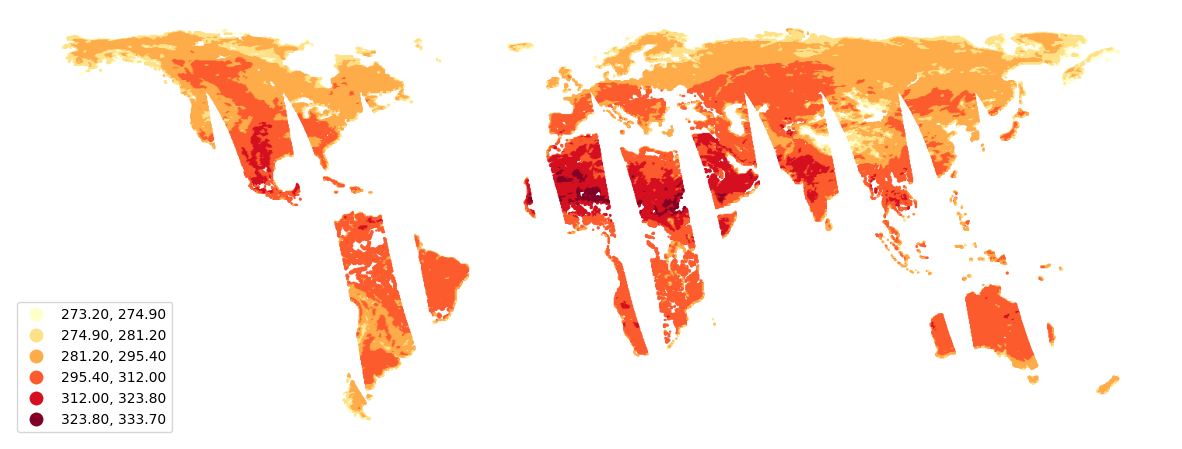

In [28]:
gsp.heatmap(ts, column='ts', point_data=True, markersize=0.5)

# Raster Data Handling

https://ghsl.jrc.ec.europa.eu/download.php?ds=pop

In [29]:
import rasterio
import pandas as pd
import json
from rasterio.mask import mask

In [30]:
data = rasterio.open("GHS_POP_P2030_GLOBE_R2022A_54009_1000_V1_0_R6_C26.tif")

In [31]:
data.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': -200.0,
 'width': 1000,
 'height': 1000,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(1000.0, 0.0, 6959000.0,
        0.0, -1000.0, 4000000.0)}

In [32]:
data.bounds

BoundingBox(left=6959000.0, bottom=3000000.0, right=7959000.0, top=4000000.0)

In [33]:
import matplotlib.pyplot as plt

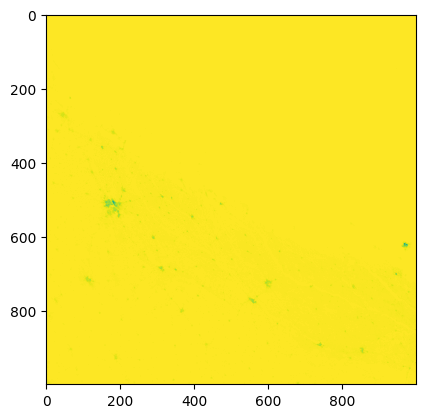

In [34]:
plt.imshow(data.read(1), cmap='viridis_r')

In [35]:
india = gpd.read_file("india.shp")

In [36]:
india.head()

,OBJECTID,State,Shape__Are,Shape__Len,geometry
0,1,ANDAMAN & NICOBAR ISLANDS,0.615218,33.497524,"MULTIPOLYGON (((92.22896 10.98098, 92.22896 10..."
1,2,ANDHRA PRADESH,13.525556,42.318112,"MULTIPOLYGON (((81.37451 16.32791, 81.37307 16..."
2,3,ARUNACHAL PRADESH,7.501711,25.076555,"POLYGON ((97.39744 28.01197, 97.39693 28.00957..."
3,4,ASSAM,7.090855,28.366453,"POLYGON ((96.01937 27.36433, 96.01886 27.36365..."
4,5,BIHAR,8.455792,26.678193,"POLYGON ((88.29758 26.35401, 88.29725 26.35368..."


In [37]:
delhi = india[india['State']=='DELHI']

In [38]:
delhi

,OBJECTID,State,Shape__Are,Shape__Len,geometry
9,10,DELHI,0.136931,2.292822,"POLYGON ((77.34349 28.51467, 77.34341 28.51437..."


<AxesSubplot: >

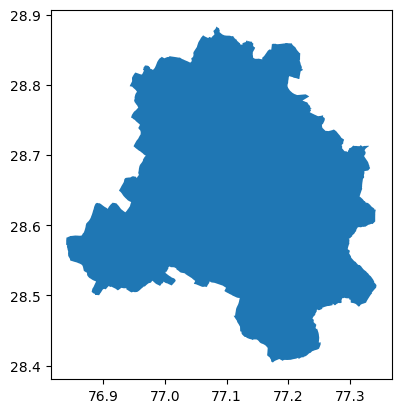

In [39]:
delhi.plot()

In [40]:
delhi.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
delhi = delhi.to_crs("ESRI:54009")

In [42]:
delhi_json = json.loads(delhi.to_json())

In [43]:
delhi_json

{'type': 'FeatureCollection',
 'features': [{'id': '9',
   'type': 'Feature',
   'properties': {'OBJECTID': 10,
    'State': 'DELHI',
    'Shape__Are': 0.136930629670815,
    'Shape__Len': 2.29282188696761},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[7155211.480929885, 3469502.9753622743],
      [7155216.724637105, 3469467.6648667455],
      [7155252.2322018845, 3469345.2550660507],
      [7155286.093403861, 3469175.7637366103],
      [7155304.924160484, 3469079.247434301],
      [7155267.896005038, 3468999.2092217426],
      [7155175.865221946, 3468801.467235133],
      [7155148.157470932, 3468736.729965009],
      [7155108.687459312, 3468653.1598300594],
      [7155102.064620877, 3468622.5567152244],
      [7155093.921202222, 3468601.3698534067],
      [7155085.273820667, 3468579.005981773],
      [7155077.716556516, 3468561.35018816],
      [7155070.076665358, 3468541.340390144],
      [7155063.9481738005, 3468524.8616801947],
      [7155055.639363372, 3468498.96654783

In [44]:
coord = [delhi_json["features"][0]["geometry"]]

In [45]:
coord

[{'type': 'Polygon',
  'coordinates': [[[7155211.480929885, 3469502.9753622743],
    [7155216.724637105, 3469467.6648667455],
    [7155252.2322018845, 3469345.2550660507],
    [7155286.093403861, 3469175.7637366103],
    [7155304.924160484, 3469079.247434301],
    [7155267.896005038, 3468999.2092217426],
    [7155175.865221946, 3468801.467235133],
    [7155148.157470932, 3468736.729965009],
    [7155108.687459312, 3468653.1598300594],
    [7155102.064620877, 3468622.5567152244],
    [7155093.921202222, 3468601.3698534067],
    [7155085.273820667, 3468579.005981773],
    [7155077.716556516, 3468561.35018816],
    [7155070.076665358, 3468541.340390144],
    [7155063.9481738005, 3468524.8616801947],
    [7155055.639363372, 3468498.96654783],
    [7155042.283278549, 3468474.2485007783],
    [7155032.710156448, 3468451.8845424424],
    [7155024.648557667, 3468433.051679008],
    [7154997.19257833, 3468362.42845066],
    [7154968.909675415, 3468268.2638742635],
    [7154969.504506559, 346825

In [46]:
out_image, out_transform = mask(data, shapes=coord, crop=True)

In [47]:
out_image

array([[[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]]])

In [48]:
out_transform

Affine(1000.0, 0.0, 7105000.0,
       0.0, -1000.0, 3513000.0)

In [49]:
out_meta = data.meta.copy()
out_meta.update(
    {
        "driver": "GTiff",
        "height": out_image.shape[1],
        "width": out_image.shape[2],
        "transform": out_transform,
    }
)

In [50]:
 with rasterio.open("delhi.tif", "w", **out_meta, compress="lzw") as dest:
    dest.write(out_image)

In [51]:
delhi_tif = rasterio.open("delhi.tif")

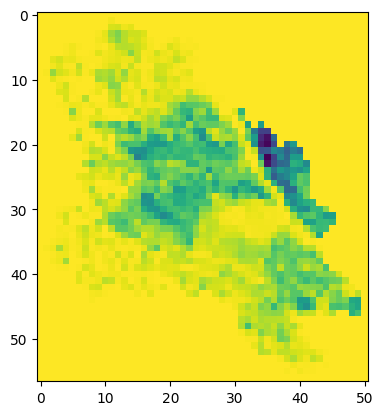

In [52]:
plt.imshow(delhi_tif.read(1), cmap='viridis_r')

In [53]:
import rioxarray as rx
import numpy as np

In [54]:
data = rx.open_rasterio("delhi.tif")

In [55]:
df = data.to_dataframe(name="pop").reset_index()

In [56]:
df['pop'] = df['pop'].replace(-200.0,np.nan)

In [57]:
df.describe()

,band,y,x,spatial_ref,pop
count,2907.0,2.907000e+03,2.907000e+03,2907.0,1488.000000
mean,1.0,3.484500e+06,7.130500e+06,0.0,14334.890987
std,0.0,1.645478e+04,1.472213e+04,0.0,15814.284581
min,1.0,3.456500e+06,7.105500e+06,0.0,0.000000
25%,1.0,3.470500e+06,7.117500e+06,0.0,2194.344235
50%,1.0,3.484500e+06,7.130500e+06,0.0,8603.684155
75%,1.0,3.498500e+06,7.143500e+06,0.0,22775.037420
max,1.0,3.512500e+06,7.155500e+06,0.0,101587.840271


In [58]:
df = df.dropna()

In [59]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['x'], df['y']))

In [60]:
gdf.crs = "ESRI:54009"

In [61]:
gdf.crs

<Derived Projected CRS: ESRI:54009>
Name: World_Mollweide
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Mollweide
- method: Mollweide
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

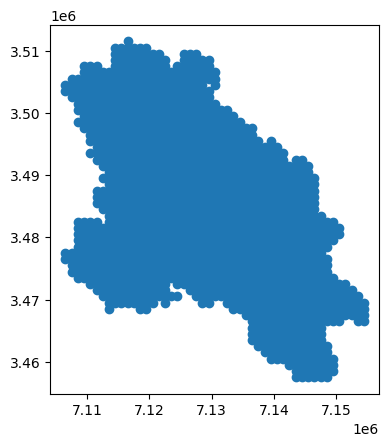

In [62]:
gdf.plot()

In [63]:
gdf = gdf.to_crs("4326")

<AxesSubplot: >

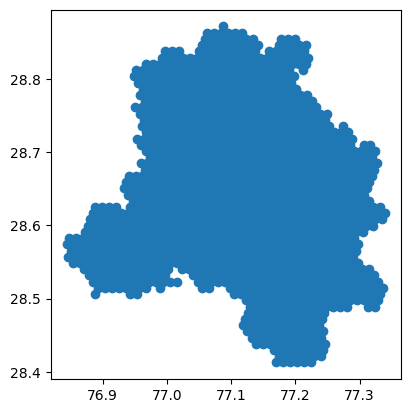

In [64]:
gdf.plot()

<AxesSubplot: >

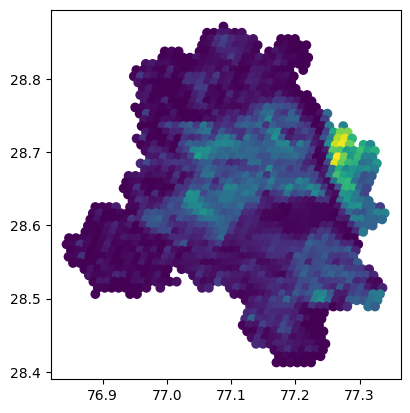

In [65]:
gdf.plot(column='pop')

<AxesSubplot: >

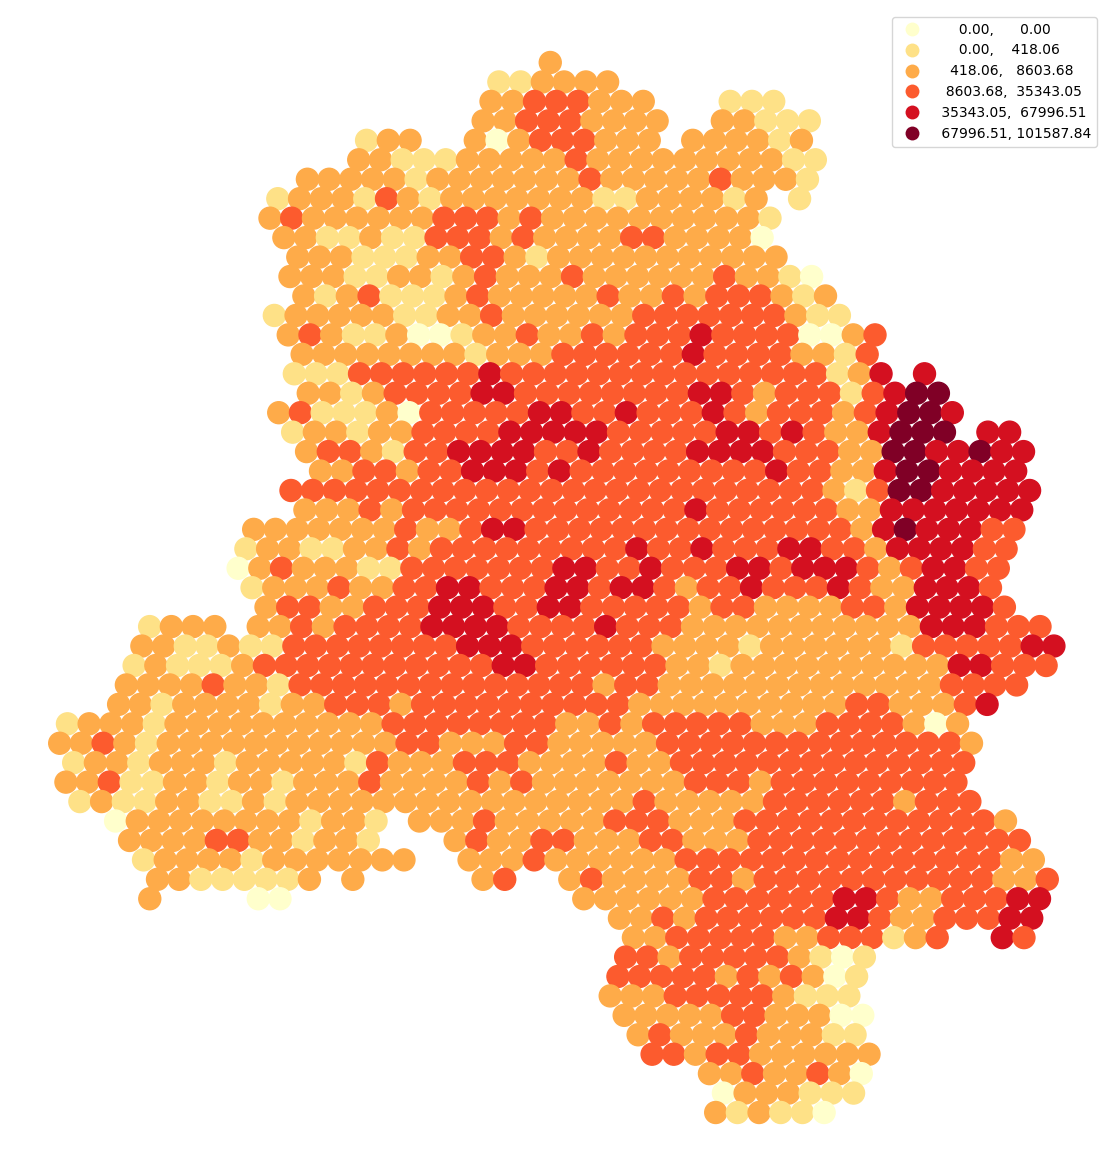

In [66]:
gsp.heatmap(gdf.dropna(), column='pop', point_data=True, markersize=250)